In [1]:
# Imports

from IPython.display import clear_output
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import spacy
import re
import string
from collections import Counter
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
import tqdm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Downloading the Spam SMS Dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip

!unzip /content/smsspamcollection.zip
!rm /content/readme
!rm !rm /content/smsspamcollection.zip

clear_output()

In [3]:
# Downloading the GloVe embeddings database

!wget https://nlp.stanford.edu/data/glove.6B.zip

!unzip /content/glove.6B.zip

!rm -rf /content/glove.6B.zip
!rm /content/glove.6B.100d.txt
!rm /content/glove.6B.200d.txt
!rm /content/glove.6B.300d.txt

clear_output()

In [4]:
text = []
label = []


    ###########YOUR CODE HERE###########

In [5]:
df = open('/content/SMSSpamCollection', "r")
lines = df.readlines()


In [6]:
for line in lines:
  x=line.split('\t', 1)
  text.append(x[1])
  if x[0]=="ham":
    label.append(0)
  elif x[0]=="spam":
    label.append(1)

In [7]:
for index, line in enumerate(lines):
      lines[index] = line.strip()
      #removes whitespaces

In [8]:
# Creating a Pandas Dataframe
sms = pd.DataFrame(zip(text, label), columns = ["Text", "Label"])


In [9]:
sms

,Text,Label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


In [10]:
sms['Text_Length']=[len(x) for x in sms['Text']]

In [11]:
sms

,Text,Label,Text_Length
0,"Go until jurong point, crazy.. Available only ...",0,112
1,Ok lar... Joking wif u oni...\n,0,30
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156
3,U dun say so early hor... U c already then say...,0,50
4,"Nah I don't think he goes to usf, he lives aro...",0,62
...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,161
5570,Will ü b going to esplanade fr home?\n,0,37
5571,"Pity, * was in mood for that. So...any other s...",0,58
5572,The guy did some bitching but I acted like i'd...,0,126


In [12]:
spacy_tokenizer = spacy.load('en_core_web_sm')

In [13]:
##clean data
from string import punctuation
import re
xdata=[]
def preprocess_text(text):
    text = text.lower()
    text = " ".join(text.split())
    text = re.sub(r"\b[0-9]+\b\s*", "", text)
    text = ''.join(char for char in text if ord(char) < 128)
    xdata.append(text)
    doc = spacy_tokenizer(text)
    tokens = [token.text for token in doc]
    return tokens

In [14]:
sms["Tokenized_Text"] =sms['Text'].map(preprocess_text)

In [15]:
sms

,Text,Label,Text_Length,Tokenized_Text
0,"Go until jurong point, crazy.. Available only ...",0,112,"[go, until, jurong, point, ,, crazy, .., avail..."
1,Ok lar... Joking wif u oni...\n,0,30,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,156,"[free, entry, in, a, wkly, comp, to, win, fa, ..."
3,U dun say so early hor... U c already then say...,0,50,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,"Nah I don't think he goes to usf, he lives aro...",0,62,"[nah, i, do, n't, think, he, goes, to, usf, ,,..."
...,...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,161,"[this, is, the, 2nd, time, we, have, tried, co..."
5570,Will ü b going to esplanade fr home?\n,0,37,"[will, , b, going, to, esplanade, fr, home, ?]"
5571,"Pity, * was in mood for that. So...any other s...",0,58,"[pity, ,, *, was, in, mood, for, that, ., so, ..."
5572,The guy did some bitching but I acted like i'd...,0,126,"[the, guy, did, some, bitching, but, i, acted,..."


In [16]:
def load_GloVe_embeddings(glove_file):
  embeddings_dict = {}
  with open(glove_file, 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector
  return embeddings_dict

In [21]:
!wget --no-check-certificate \
     https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip \
     -O glove.6B.zip

--2025-06-17 09:57:35--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
  Issued certificate has expired.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.00MB/s    in 2m 39s  

2025-06-17 10:00:14 (5.16 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [23]:
!unzip glove.6B.zip -d glove_data

Archive:  glove.6B.zip
  inflating: glove_data/glove.6B.50d.txt  
  inflating: glove_data/glove.6B.100d.txt  
  inflating: glove_data/glove.6B.200d.txt  
  inflating: glove_data/glove.6B.300d.txt  


In [25]:
!ls /content/glove_data

glove.6B.100d.txt  glove.6B.200d.txt  glove.6B.300d.txt  glove.6B.50d.txt


In [60]:
embed_dict = load_GloVe_embeddings('/content/glove_data/glove.6B.50d.txt')
#stores vectorised value of each word in a dictionary

In [64]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [65]:
corpus = sms['Tokenized_Text'].tolist()

In [66]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
#assigns unique integer value to each string (dictionary)
sequences = tokenizer.texts_to_sequences(corpus)
# creates new list with internally
word_index = tokenizer.word_index
#stores the dictionary created in fit_ontexts
finaldata = pad_sequences(sequences, maxlen=50)
#every sentence is limited to first 50 words, put 0 in case of length <50

In [67]:
len(sequences), sequences[0]

(5574,
 [61,
  464,
  4159,
  802,
  5,
  723,
  18,
  657,
  78,
  14,
  1252,
  104,
  135,
  368,
  1253,
  173,
  2803,
  10,
  1254,
  73,
  67,
  4160,
  148,
  10])

In [51]:
len(word_index)

8836

In [52]:
len(corpus)

5574

In [53]:
embedding_matrix = np.zeros((len(tokenizer.word_index)+1, 50))
for word, i in tokenizer.word_index.items():
    embedding_vector = embed_dict.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

embedding_matrix.shape

(8837, 50)

In [54]:
y = np.array(sms['Label'].tolist())

In [55]:
y
type(sms.Label)

pandas.core.series.Series

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(finaldata, sms.Label, test_size = 0.2, random_state = 2)

In [57]:
print('Shape of train sequences: ',X_train.shape)
print('Shape of train labels: ',Y_train.shape)
print("Shape of Validation sequences: ",X_test.shape)
print("Shape of Validation  labels: ",Y_test.shape)

Shape of train sequences:  (4459, 50)
Shape of train labels:  (4459,)
Shape of Validation sequences:  (1115, 50)
Shape of Validation  labels:  (1115,)


Epoch  1 -- train loss: 0.7291, val acc: 0.8368
Epoch  2 -- train loss: 0.5751, val acc: 0.8529
Epoch  3 -- train loss: 0.4618, val acc: 0.8529
Epoch  4 -- train loss: 0.4120, val acc: 0.8529
Epoch  5 -- train loss: 0.3943, val acc: 0.8529
Epoch  6 -- train loss: 0.3889, val acc: 0.8529
Epoch  7 -- train loss: 0.3886, val acc: 0.8529
Epoch  8 -- train loss: 0.3875, val acc: 0.8529
Epoch  9 -- train loss: 0.3882, val acc: 0.8529
Epoch 10 -- train loss: 0.3874, val acc: 0.8529


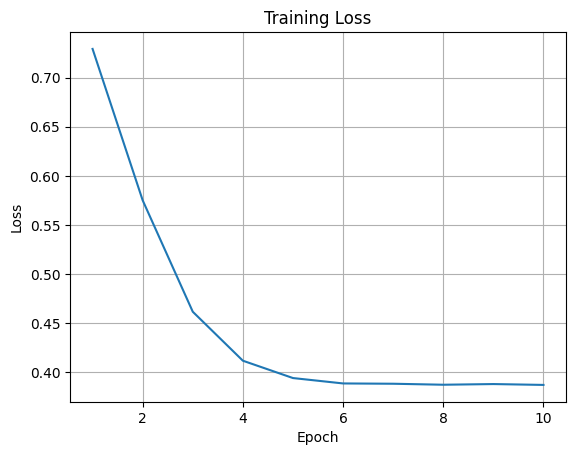

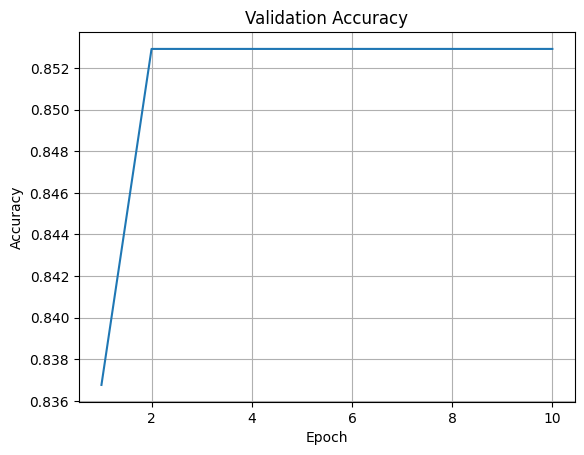

In [59]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

# — assume SpamDataset, SpamLSTM, train_loader & test_loader are already defined —

device    = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model     = SpamLSTM(embedding_matrix).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

num_epochs     = 10
train_losses   = []
val_accuracies = []

for epoch in range(1, num_epochs+1):
    # ---- Training ----
    model.train()
    total_loss = 0.0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        optimizer.zero_grad()
        out   = model(xb)
        loss  = criterion(out, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)

    # ---- Validation Accuracy ----
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for xb, yb in test_loader:
            xb, yb = xb.to(device), yb.to(device)
            out = model(xb)
            preds = (out > 0.5).float()
            correct += (preds == yb).sum().item()
            total   += yb.size(0)
    val_acc = correct / total
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch:2d} -- train loss: {avg_loss:.4f}, val acc: {val_acc:.4f}")

# ---- Plot Training Loss ----
plt.figure()
plt.plot(range(1, num_epochs+1), train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# ---- Plot Validation Accuracy ----
plt.figure()
plt.plot(range(1, num_epochs+1), val_accuracies)
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

              precision    recall  f1-score   support

         ham       0.85      1.00      0.92       951
        spam       0.00      0.00      0.00       164

    accuracy                           0.85      1115
   macro avg       0.43      0.50      0.46      1115
weighted avg       0.73      0.85      0.79      1115



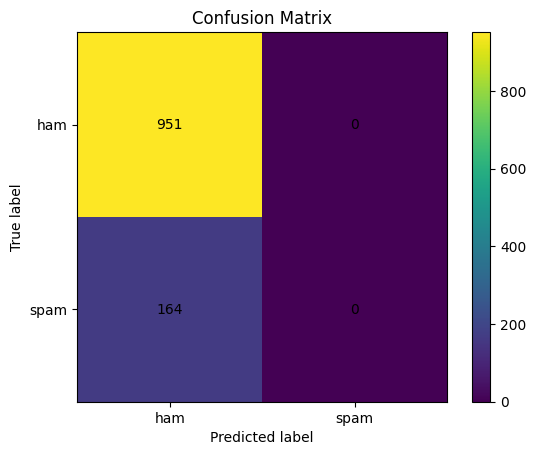

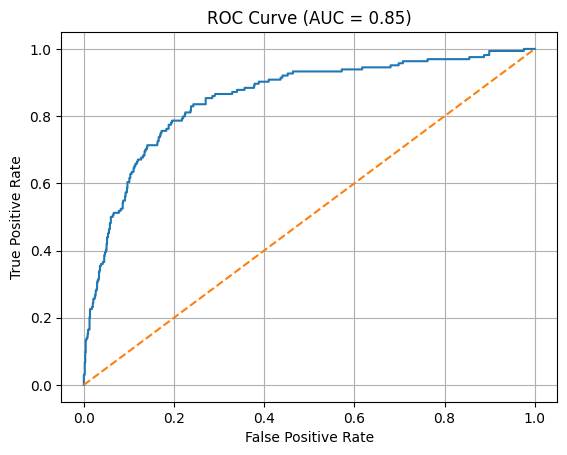

In [69]:


# — 1) Gather all test labels & model outputs —
model.eval()
all_preds  = []
all_probs  = []
all_labels = []

with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        out = model(xb)                    # raw sigmoid score
        prob = out.cpu().numpy()
        pred = (out > 0.5).float().cpu().numpy()
        all_probs.append(prob)
        all_preds.append(pred)
        all_labels.append(yb.numpy())

all_probs  = np.concatenate(all_probs)
all_preds  = np.concatenate(all_preds)
all_labels = np.concatenate(all_labels)

# — 2) Text summary —
print(classification_report(all_labels, all_preds,
                            target_names=['ham','spam']))

# — 3) Confusion matrix plot —
cm = confusion_matrix(all_labels, all_preds)
plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0,1], ['ham','spam'])
plt.yticks([0,1], ['ham','spam'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center')
plt.colorbar()
plt.show()

# — 4) ROC curve & AUC —
fpr, tpr, _    = roc_curve(all_labels, all_probs)
roc_auc        = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='--')  # random‐chance line
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.show()